## Steps to build Neural Network from scratch using PyTorch

1. Loading the dataset (input and output)

2. Architecture of the model (number of input, hidden and output neurons)

3. Initializing the weights for all layers

4. Implementing forward propagation

5. Implementing backward propagation

6. Train model for n epochs

### 1. Loading the dataset (input and output)

In [ ]:
# importing required libraries

import torch
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# creating input tensor
X = torch.tensor([[1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 0, 1]], dtype = torch.float)
print('Input: ')
print(X)

# shape of input tensor
print('Shape of input: ', X.shape)


Input: 
tensor([[1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [0., 1., 0., 1.]])
Shape of input:  torch.Size([3, 4])


In [ ]:
# converting input in matrix form
X = X.t()
print('Input in matrix form: ')
print(X)

# shape of input matrix
print('Shape of input matrix: ', X.shape)

Input in matrix form: 
tensor([[1., 1., 0.],
        [0., 0., 1.],
        [1., 1., 0.],
        [0., 1., 1.]])
Shape of input matrix:  torch.Size([4, 3])


In [ ]:
# creating output tensor
y = torch.tensor([[1], [1], [0]], dtype = torch.float)
print('Actual Output: ')
print(y)

# output in matrix form
y = y.t()
print('output in matrix form: ')
print(y)

# shape of output array
print('Shape of output: ', y.shape)

Actual Output: 
tensor([[1.],
        [1.],
        [0.]])
output in matrix form: 
tensor([[1., 1., 0.]])
Shape of output:  torch.Size([1, 3])


### 2. Architecture of the model (number of input, hidden and output neurons)

In [ ]:
# number of features in the dataset
input_layer_neurons = X.shape[0]

# number of hidden layer neurons
hidden_layer_neurons = 3

# number of eurons in output layer
output_neurons = 1

### 3. Initializing the weights for all layers

In [ ]:
# w_input_hidden is number of neurons in input layer times number of neurons in hidden layer
w_input_hidden = torch.randn(input_layer_neurons, hidden_layer_neurons)

# w_hidden_output is number of neurons in hidden layer times number of neurons in output layer
w_hidden_output = torch.randn(hidden_layer_neurons, output_neurons)

In [ ]:
# shape of weight matrix
w_input_hidden.shape, w_hidden_output.shape

(torch.Size([4, 3]), torch.Size([3, 1]))

### 4. Implementing forward propagation

In [ ]:
# we are using sigmoid as an activation function.

# defining the sigmoid funtion:
def sigmoid(s):
  return 1 / (1 + torch.exp(-s))

In [ ]:
# hidden layer activations
hidden_layer_input = torch.matmul(w_input_hidden.t(), X)
hidden_layer_activations = sigmoid(hidden_layer_input)

In [ ]:
# calculating output
output_layer_input = torch.matmul(w_hidden_output.t(), hidden_layer_activations)
output = sigmoid(output_layer_input)
output

tensor([[0.1300, 0.1087, 0.1524]])

### 5. Implementing backward propagation

In [ ]:
# calculating error
error = torch.pow(y-output, 2) / 2
error

tensor([[0.3784, 0.3972, 0.0116]])

#### 1) Rate of change of error with respect to w_hidden_output.



**1. Input Weights ${W}_{\text {ih }}$ and Bias ${b}_{\mathrm{ih}}$:**


*   ${W}_{\text {ih }}$: Weight matrix for the input-to-hidden layer
*   ${b}_{\mathrm{ih}}$: Bias vector for the input-to-hidden layer

**2. Input Activation $X$:**

*   $X$: input activation vector

**3. Compute ${Z}_1$:**

$$ \mathrm{Z}_1=\mathrm{W}_{\text {ih }}{ }^{\top} \mathrm{X}+\mathrm{b}_{\mathrm{ih}} $$

**4. Apply Activation Function $\sigma$ to ${Z}_1$:**

$$ \mathrm{h}_1=\sigma\left(\mathrm{Z}_1\right) $$

**5. Hidden-to-output Weights ${W}_{\mathrm{ho}}$ and Bias ${b}_{\mathrm{ho}}$:**

*   ${W}_{\text {ho }}$: Weight matrix for the hidden-to-output layer
*   ${b}_{\mathrm{ho}}$: Bias vector for the hidden-to-output layer

**6. Compute ${Z}_2$:**
$$ \mathrm{Z}_2=\mathrm{W}_{\mathrm{ho}}{ }^{\mathrm{T}} \mathrm{h}_1+\mathrm{b}_{\mathrm{ho}} $$

**7. Apply Activation Function $\sigma$ to ${Z}_2$:**
$$ \mathrm{O}=\sigma\left(\mathrm{Z}_2\right) $$


**8. Expected Output $Y$:**
*   $Y$: Target output

**9. Calculate Error $E$:**
$$ \mathrm{E}=(\mathrm{Y}-\mathrm{O})^2 / 2 $$

**10. Compute the Gradient of Error with respect to $W_{ho}$ using Chain Rule:**
$$ \frac{dE}{dW_{ho}} = \frac{dZ_2}{dW_{ho}} \cdot \left[ \frac{dE}{dO} \cdot \frac{dO}{dZ_{2}} \right]^T $$

*   First, calculate the partial derivative of ${Z}_2$ with respect to $W_{ho}$.

*   Then, multiply it by the transpose of the product of the partial derivatives of $E$ with respect to $O$ and $O$ with respect to ${Z}_2$.



In [ ]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

# rate of change of output w.r.t. Z2
output_wrt_Z2 = torch.mul(output, (1-output))

# rate of change of Z2 w.r.t. weights between hidden and output layer
Z2_wrt_who = hidden_layer_activations

In [ ]:
# rate of change of error w.r.t. weights between hidden and output layer
error_wrt_who = torch.matmul(Z2_wrt_who, (error_wrt_output*output_wrt_Z2).t())

#### 2) Rate of change of error with respect to w_input_hidden.



**1. Compute ${Z}_1$:**

$$\mathrm{Z}_1=\mathrm{W}_{\text {ih }}{ }^{\top} \mathrm{X}+\mathrm{b}_{\mathrm{ih}} $$

**2. Apply Activation Function $\sigma$ to ${Z}_1$:**

$$\mathrm{h}_1=\sigma\left(\mathrm{Z}_1\right)$$

**3. Compute the Gradient of $h_1$ with respect to $Z_1$:**

$$\frac{dh_1}{dZ_1} = \sigma'(Z_1)$$

**4. Hidden-to-output Weights ${W}_{\mathrm{ho}}$ and Bias ${b}_{\mathrm{ho}}$:**

*   ${W}_{\text {ho }}$: Weight matrix for the hidden-to-output layer

*   ${b}_{\mathrm{ho}}$: Bias vector for the hidden-to-output layer

**5. Compute ${Z}_2$:**
$$ \mathrm{Z}_2=\mathrm{W}_{\mathrm{ho}}{ }^{\mathrm{T}} \mathrm{h}_1+\mathrm{b}_{\mathrm{ho}} $$

**6. Compute the Gradient of $Z_2$ with respect to $W_{ho}$:**

$$\frac{dZ_2}{dW_{ho}} = h_1$$

**7. Compute the Gradient of $E$ with respect to $O$:**

$$ \frac{dE}{dO} = - (Y - O)$$


**8. Compute the Gradient of $O$ with respect to $Z_2$:**

$$\frac{dO}{dZ_2} = \sigma'(Z_2)$$

**9. Transpose the Gradient $Z_2$ with respect to ${dW_{ho}}$:**
$$\left[\frac{dZ_2}{dW_{ho}}\right]^T = h_1 ^ T$$

**10. Combine the Gradients using Chain Rule:**

*   Multiply, the gradients computed in steps 3, 6, 7 and 8.

*  Transpose the result.

$$ \frac{dE}{dW_{ih}} = \frac{dZ_1}{dW_{ih}} \cdot \left[ \frac{dh_1}{dZ_1} \cdot \frac{dZ_2}{dW_{ho}} \cdot \left[ \frac{dE}{dO} \cdot \frac{dO}{dZ_{2}} \right] \right]^T $$

In [ ]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

# rate of change of output w.r.t. Z2
output_wrt_Z2 = torch.mul(output, (1-output))

# rate of change of Z2 w.r.t. hidden layer activations
Z2_wrt_h1 = w_hidden_output

# rate of change of hidden layer activations w.r.t. Z1
h1_wrt_Z1  = torch.matmul(hidden_layer_activations, (1-hidden_layer_activations))

# rate of change of Z1 w.r.t. weights between input and hidden layer
Z1_wrt_wih = X

In [ ]:
# rate of change of error w.r.t. weights between input and hidden layer
error_wrt_wih = torch.matmul(Z1_wrt_wih, (h1_wrt_Z1*torch.matmul(Z2_wrt_h1, (output_wrt_Z2*error_wrt_output))).t())

### Update the parameters

In [ ]:
# defining learning rate
lr = 0.01

In [ ]:
# initial w_input_hidden
w_input_hidden

tensor([[ 0.3750,  0.8466, -1.2680],
        [-0.4884,  0.5736,  1.0044],
        [ 0.3969,  1.7940,  0.4790],
        [ 0.6892,  1.3848, -0.8252]])

In [ ]:
# initial w_hidden_output
w_hidden_output

tensor([[-1.8215],
        [-0.5698],
        [-0.3937]])

In [ ]:
# updating weights of output layer
w_hidden_output = w_hidden_output - lr * error_wrt_who
w_hidden_output

tensor([[-1.8202],
        [-0.5682],
        [-0.3933]])

In [ ]:
# updating weights of hidden layer
w_input_hidden = w_input_hidden - lr * error_wrt_wih
w_input_hidden

tensor([[ 0.3729,  0.8456, -1.2683],
        [-0.4882,  0.5737,  1.0044],
        [ 0.3948,  1.7931,  0.4787],
        [ 0.6885,  1.3845, -0.8253]])

### 6. Train model for n epochs

In [ ]:
# defining model architecture

# number of features in the dataset
input_layer_neurons = X.shape[0]

# number of hidden layer neurons
hidden_layer_neurons = 3

# number of eurons in output layer
output_neurons = 1

In [ ]:
# initializing weights

# w_input_hidden is number of neurons in input layer times number of neurons in hidden layer
w_input_hidden = torch.randn(input_layer_neurons, hidden_layer_neurons, dtype = torch.float)

# w_hidden_output is number of neurons in hidden layer times number of neurons in output layer
w_hidden_output = torch.randn(hidden_layer_neurons, output_neurons, dtype = torch.float)

In [ ]:
# defining the parameters

lr = 0.01
epochs = 10000

In [ ]:
# initial w_input_hidden
w_input_hidden

tensor([[-0.2615, -0.2266, -0.2066],
        [-0.0849,  0.1225, -1.5832],
        [-0.0043, -0.7979,  0.1768],
        [-0.3401,  1.0397,  1.4195]])

In [ ]:
# initial w_hidden_output
w_hidden_output

tensor([[-0.6856],
        [ 1.7916],
        [-1.4329]])

In [ ]:
error_epoch = []

for epoch in range(epochs):
  # forward propagation

  # hidden layer activations
  hidden_layer_input = torch.matmul(w_input_hidden.t(), X)
  hidden_layer_activations = sigmoid(hidden_layer_input)

  # calculating output
  output_layer_input = torch.matmul(w_hidden_output.t(), hidden_layer_activations)
  output = sigmoid(output_layer_input)

  # backward propagation

  # calculating error
  error = torch.pow(y-output, 2) / 2

  # rate of change of error w.r.t. output
  error_wrt_output = -(y - output)
  # rate of change of output w.r.t. Z2
  output_wrt_Z2 = torch.mul(output, (1-output))
  # rate of change of Z2 w.r.t. weights between hidden and output layer
  Z2_wrt_who = hidden_layer_activations

  # rate of change of error w.r.t. weights between hidden and output layer
  error_wrt_who = torch.matmul(Z2_wrt_who, (error_wrt_output*output_wrt_Z2).t())


  # rate of change of error w.r.t. output
  error_wrt_output = -(y - output)
  # rate of change of output w.r.t. Z2
  output_wrt_Z2 = torch.mul(output, (1-output))
  # rate of change of Z2 w.r.t. hidden layer activations
  Z2_wrt_h1 = w_hidden_output
  # rate of change of hidden layer activations w.r.t. Z1
  h1_wrt_Z1  = torch.matmul(hidden_layer_activations, (1-hidden_layer_activations))
  # rate of change of Z1 w.r.t. weights between input and hidden layer
  Z1_wrt_wih = X

  # rate of change of error w.r.t. weights between input and hidden layer
  error_wrt_wih = torch.matmul(Z1_wrt_wih, (h1_wrt_Z1*torch.matmul(Z2_wrt_h1, (output_wrt_Z2*error_wrt_output))).t())

  # updating weights of output layer
  w_hidden_output = w_hidden_output - lr * error_wrt_who
  # updating weights of hidden layer
  w_input_hidden = w_input_hidden - lr * error_wrt_wih

  # appending error of each epoch
  error_epoch.append(torch.mean(error))


In [ ]:
# updated w_hidden_output
w_hidden_output

tensor([[-1.1942],
        [ 3.1716],
        [-2.2215]])

In [ ]:
# updated w_input_hidden
w_input_hidden

tensor([[-1.2873,  4.3265, -2.6441],
        [ 0.5344, -6.0283, -0.1011],
        [-1.0300,  3.7552, -2.2607],
        [-0.2632, -2.5983,  1.6607]])

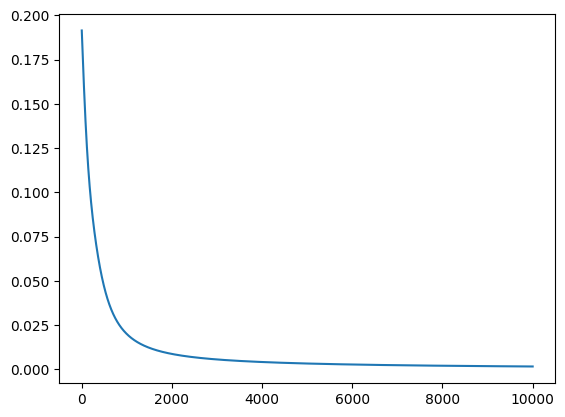

In [ ]:
# visualizing error after each epoch
plt.plot(torch.arange(1, epochs+1).numpy(), torch.tensor(error_epoch).numpy())
plt.show()

In [ ]:
# final output from model
output

tensor([[0.9547, 0.9522, 0.0750]])

In [ ]:
# actual target
y

tensor([[1., 1., 0.]])

In [ ]:
# error at last epoch
error

tensor([[0.0010, 0.0011, 0.0028]])